<a href="https://colab.research.google.com/github/AryanGKulkarni/Math-Equation-solver/blob/master/Math_Equation_Solver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
print("Loading...")

# common libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join

# CV and Image
import cv2
from PIL import Image

# pickle
import pickle

# keras
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()

print("Done")

Loading...
Done


In [6]:
data = pd.read_csv('/content/train_handwritten.csv',index_col=False)
labels = data[['label']]

data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,18,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,113,132,185,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,0,0,198,255,255,255,255,111,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
np.random.seed(1212)
labels=np.array(labels)
cat=to_categorical(labels,num_classes=19)
cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [8]:
temp=data.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(10071, 28, 28, 1)

In [9]:
l=[]
for i in range(X_train.shape[0]):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

np.random.seed(7)

In [23]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(19, activation='softmax'))

checkpoint = ModelCheckpoint("eq_solver.h5", monitor='accuracy', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
nn = model.fit(X_train, cat, epochs=200, batch_size=256, shuffle=True, verbose=1, callbacks=[checkpoint]).history

Epoch 1/200
40/40 [==============================] - ETA: 0s - loss: 6.7738 - accuracy: 0.1570
Epoch 1: accuracy improved from -inf to 0.15699, saving model to eq_solver.h5
40/40 [==============================] - 7s 166ms/step - loss: 6.7738 - accuracy: 0.1570
Epoch 2/200
40/40 [==============================] - ETA: 0s - loss: 1.9834 - accuracy: 0.3936
Epoch 2: accuracy improved from 0.15699 to 0.39361, saving model to eq_solver.h5
40/40 [==============================] - 7s 166ms/step - loss: 1.9834 - accuracy: 0.3936
Epoch 3/200
40/40 [==============================] - ETA: 0s - loss: 1.2144 - accuracy: 0.6091
Epoch 3: accuracy improved from 0.39361 to 0.60908, saving model to eq_solver.h5
40/40 [==============================] - 6s 162ms/step - loss: 1.2144 - accuracy: 0.6091
Epoch 4/200
40/40 [==============================] - ETA: 0s - loss: 0.8246 - accuracy: 0.7263
Epoch 4: accuracy improved from 0.60908 to 0.72634, saving model to eq_solver.h5
40/40 [=========================

In [ ]:
from joblib import Parallel, delayed
import joblib
 
 
# Save the model as a pickle in a file
joblib.dump(model, 'Math equation solver.pkl')
 
# Load the model from the file
model = joblib.load('Math equation solver.pkl')


In [ ]:
from joblib import Parallel, delayed
import joblib
from sklearn.tree import BaseDecisionTree

# Load the model from the file
model = joblib.load('random_forest_classifier.pkl')

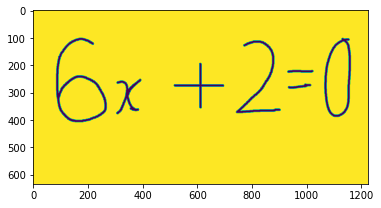

In [74]:
img = cv2.imread('/content/Untitled.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [75]:
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

7
0
[[84, 101, 186, 308], [305, 251, 91, 129], [514, 193, 184, 165], [742, 111, 163, 265], [930, 218, 95, 11], [932, 268, 85, 19], [1064, 102, 98, 288]]




---------------------------------------


=========PREDICTION============ 




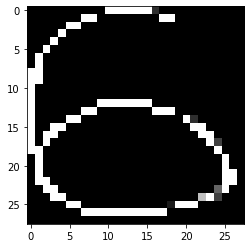



Final Output: 6

Prediction (Softmax) from the neural network:

 [[1.4477033e-24 2.4946623e-30 2.0865190e-20 1.5008309e-18 2.6780451e-31
  4.2400621e-18 9.9999928e-01 3.0595407e-33 7.3868551e-07 5.6152583e-27
  0.0000000e+00 0.0000000e+00 8.8651030e-26 1.7351505e-21 4.1630206e-25
  0.0000000e+00 1.9824680e-19 4.2158114e-30 2.0722700e-30]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




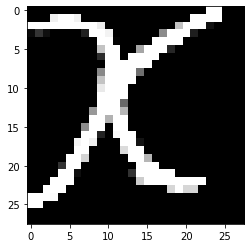



Final Output: 16

Prediction (Softmax) from the neural network:

 [[0.0000000e+00 7.3200740e-17 3.8604040e-13 0.0000000e+00 1.0727872e-24
  1.2811169e-22 1.1696601e-23 3.7308273e-21 5.8122460e-20 1.0602526e-31
  7.1397252e-28 2.6428073e-30 6.5018475e-02 5.7007155e-21 5.5560647e-25
  3.5142451e-33 9.3498158e-01 8.3456441e-31 1.2658119e-19]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




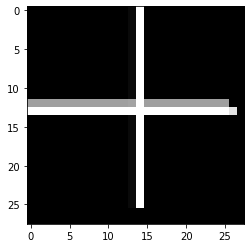



Final Output: 10

Prediction (Softmax) from the neural network:

 [[1.0538569e-36 2.9408384e-20 1.7489727e-30 6.0327980e-37 1.4993384e-18
  1.5747358e-35 5.2876999e-28 8.2800867e-15 9.3453873e-29 1.2477700e-25
  1.0000000e+00 3.6154422e-36 7.7299877e-33 2.4180286e-17 7.8613576e-28
  3.1982753e-25 9.0574932e-26 1.3486455e-19 1.1116192e-19]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




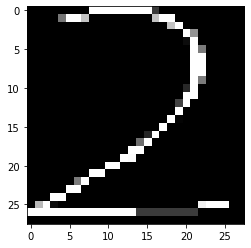



Final Output: 2

Prediction (Softmax) from the neural network:

 [[1.1464838e-16 1.1347910e-11 9.9948198e-01 2.1163882e-22 1.9174286e-25
  4.0055066e-21 2.1560620e-17 7.4966318e-09 1.7921379e-22 1.3877622e-19
  1.0770382e-24 3.4958726e-24 1.4584592e-16 2.4086722e-28 1.1723132e-21
  8.4590685e-23 5.1810546e-04 7.0553256e-28 2.4778275e-14]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




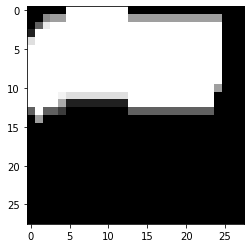



Final Output: 11

Prediction (Softmax) from the neural network:

 [[8.8744353e-15 1.0355310e-08 1.0994607e-09 5.0222571e-10 8.1433114e-08
  2.9534788e-11 7.7248788e-14 5.6015814e-09 4.3561096e-11 6.9466422e-10
  8.6813134e-07 8.0321354e-01 1.5342691e-10 1.5561280e-05 1.9676988e-01
  2.3688784e-10 3.4516054e-10 2.2648973e-13 9.1417540e-09]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




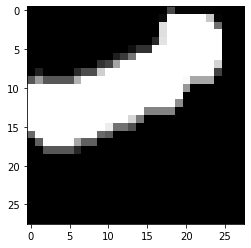



Final Output: 11

Prediction (Softmax) from the neural network:

 [[8.1328024e-14 3.2008850e-07 4.4198188e-08 1.4160581e-08 1.9971752e-08
  2.6614083e-10 3.1421795e-14 4.0627057e-08 7.9723108e-09 9.9810105e-10
  6.5634666e-08 7.4402881e-01 2.8085279e-09 3.2438189e-03 2.5272694e-01
  3.7185381e-09 5.0664601e-11 4.9467271e-11 8.0002316e-09]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




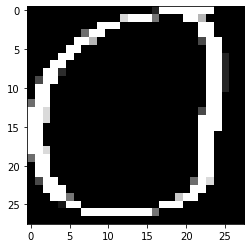



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1.0000000e+00 3.1419986e-23 1.1910469e-20 1.0534290e-17 7.9904702e-25
  2.8774913e-23 1.7550042e-19 7.8595450e-24 1.5248621e-18 3.3565351e-18
  0.0000000e+00 1.4790224e-28 2.0338543e-33 3.3476975e-34 5.9700031e-29
  3.9042983e-33 4.4172244e-23 3.4148216e-25 1.9682265e-35]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [76]:
for digit in train_data:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

In [77]:
equation=''

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
        
    for j in range(10) :
        if result[0] == j :
            equation = equation + str(j)
    
    if result[0] == 10 :
        equation = equation + "+"
    if result[0] == 11 :
        equation = equation + "-"
    if result[0] == 12 :
        equation = equation + "*"
    if result[0] == 13 :
        equation = equation + "/"
    if result[0] == 14 :
        equation = equation + "="
    if result[0] == 15 :
        equation = equation + "."
    if result[0] == 16 :
        equation = equation + "x"
    if result[0] == 17 :
        equation = equation + "y"      
    if result[0] == 18 :
        equation = equation + "z"
    
print("Your Equation :", equation)

Your Equation : 6x+2--0
